In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from scipy.stats import iqr

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Converting the dataset to a binary classification dataset from multiclass classification problem.

In [ ]:
reviews = []
for i in df["quality"]:
    if i>= 0 and i<=6:
        reviews.append(0)
    else:
        reviews.append(1)

df["quality"] = reviews

In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        0  
1596     11.0        0  
1597     10.2        0  
1598     11.0        0  

[1599 rows x 12 columns]

In [ ]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## Checking for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can understand from the dataset that there are no null-values or whitespaces. How did we conclude that ? If whitespaces were present then the datatype of the feature would have been an 'object type'. Since that is not the case all the values are present.

In [ ]:
df.isna().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
Name: count, dtype: int64

<Axes: >

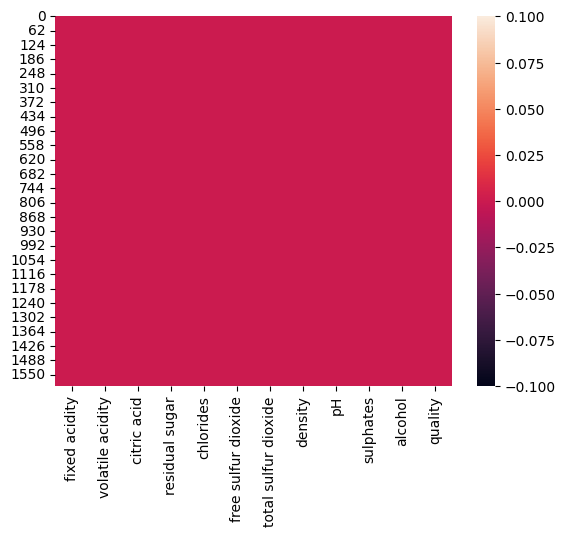

In [ ]:
sns.heatmap(df.isnull())

## Checking the target values in the dataset

All the values are present and there are 6 different types of classes which means that this is a Classification problem.

In [ ]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
df['quality'].value_counts().sum()

1599

## Description of the dataset and Outlier detection

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

1.) The data is skewed to the right as the mean is greater than the median i.e 50% for the columns - 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulphur dioxide', 'total sulphur dioxide', 'ph', 'sulphates','alcohol'.

2.) The data is skewed to the left as the mean is less than the median i.e for columns - 'density'.(But not by much value, hence it can be considered normally distributed).

3.) Outliers are present in the dataset, we can confirm that by looking at the min and 25% values and 75% and max values. If the difference is to much then the outliers are present.

## Plotting a histogram for all the numerical values

[]

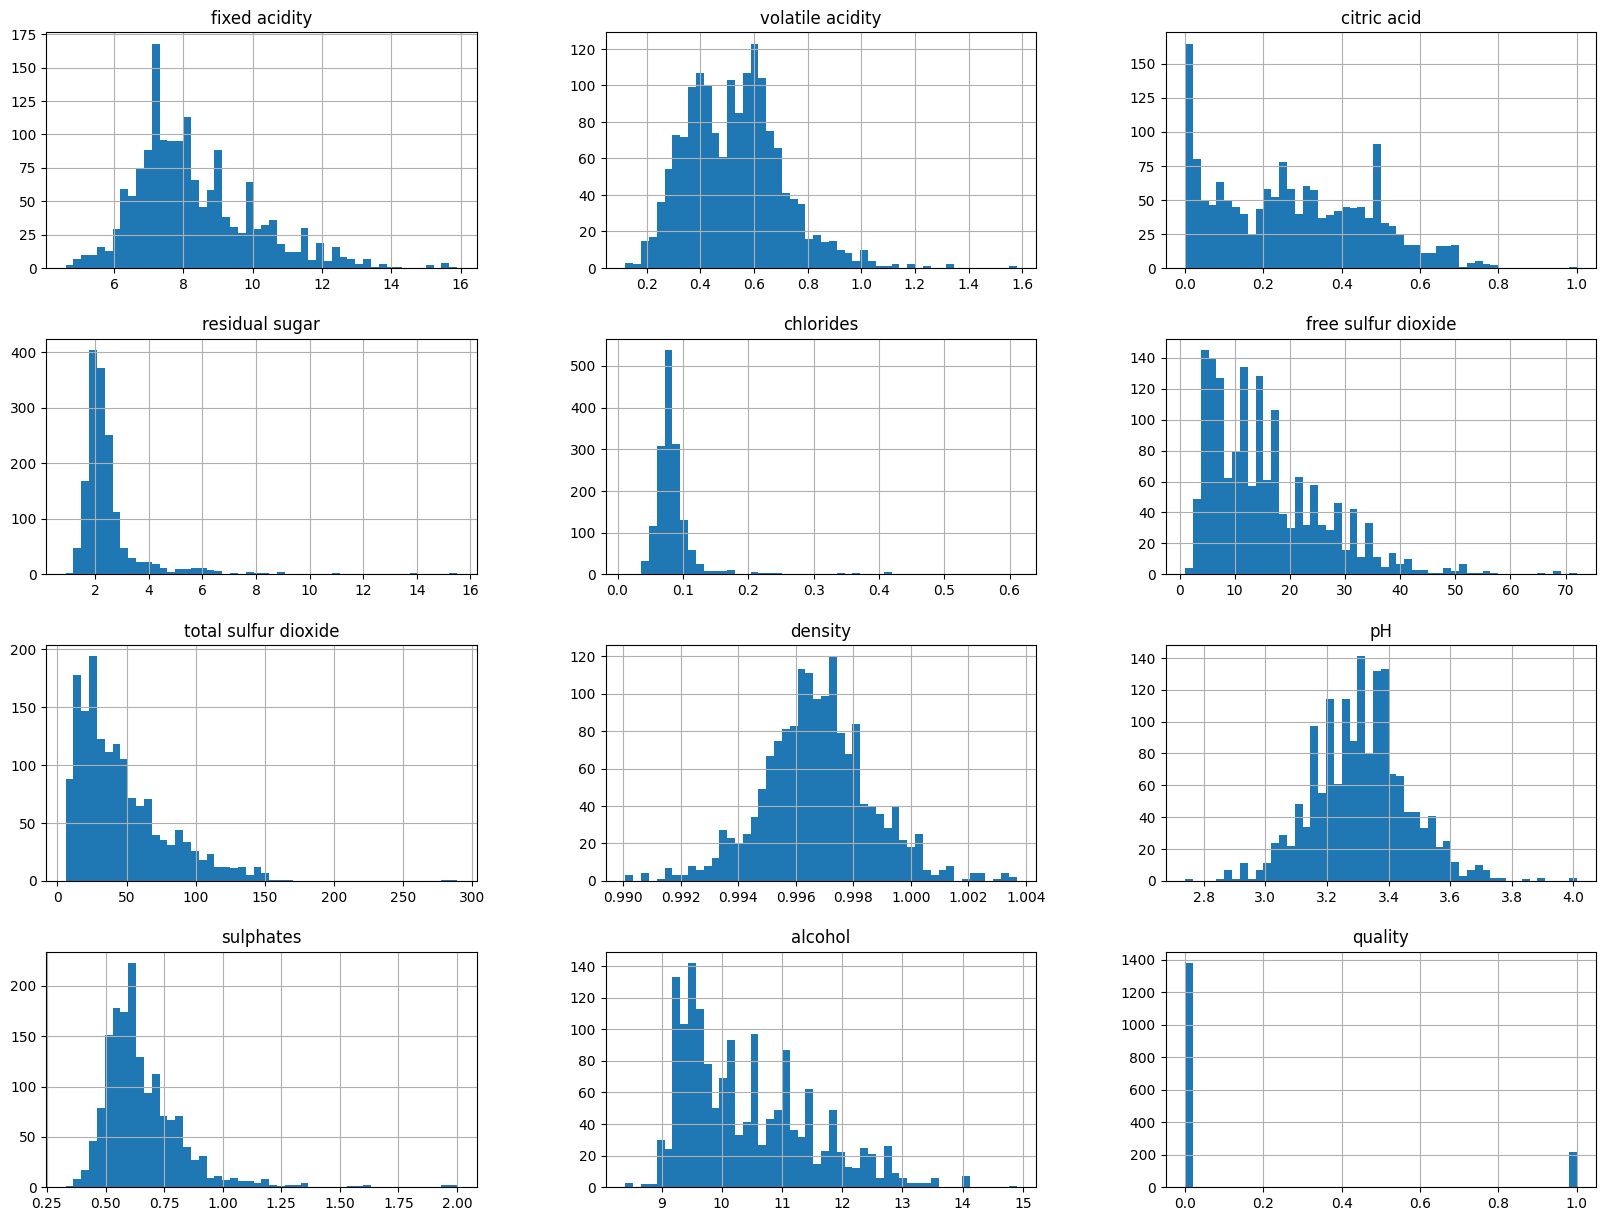

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.plot()

As from the histograms it is clear when it comes to quality that we have more instances for 5th and 6th class where as for the rest of them the number of instances is extremely low. Hence we will need to use STRATIFIED SHUFFLING !

STRATIFIED SHUFFLING - It will keep the ratio of each instance equal in the train as well as test set i.e if there are 100 samples with class 5 and 50 with class 6 then with 20% split :

1.) Train set - 80 samples - Class 5 and 40 samples Class 6.
2.) Test set - 20 samples - Class 5 and 10 samples Class 6.

How is this helpful ? If we randomly split the dataset then this ratio won't be maintained at all. It could happen that all the CLASS 5 samples go in the train set and maybe test set contains mostly CLASS 6 samples, this will cause the model to be baised and won't be able to generalise well as it won't have seen the data for CLASS 6.

## Visualizations

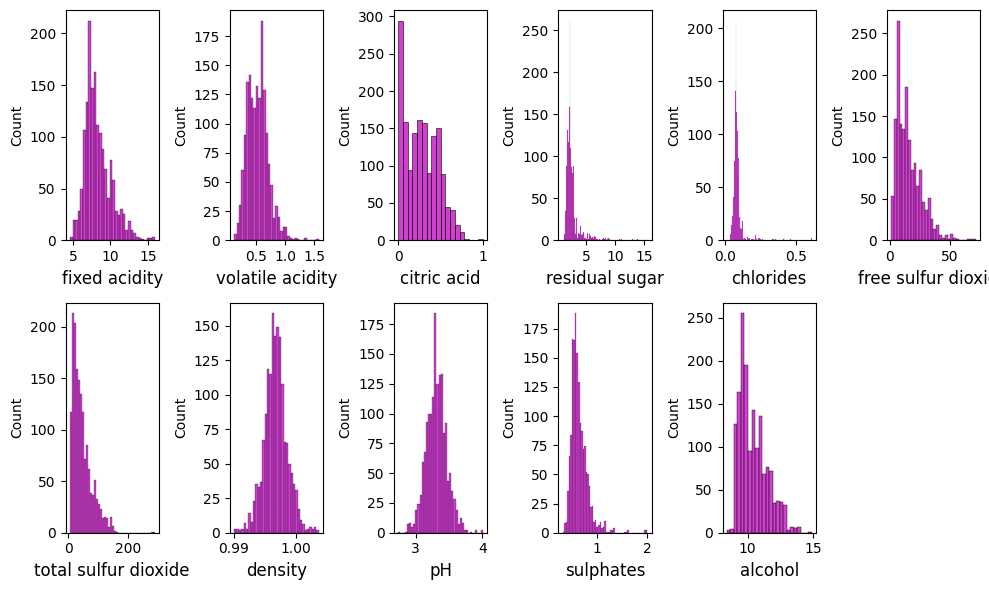

In [ ]:
plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in df.columns:
  if plotnumber <= 11:
    ax = plt.subplot(2, 6, plotnumber)
    sns.histplot(df[col], color='m')
    plt.xlabel(col, fontsize = 12)
    plt.yticks(rotation=0, fontsize=10)
  plotnumber += 1
plt.tight_layout()


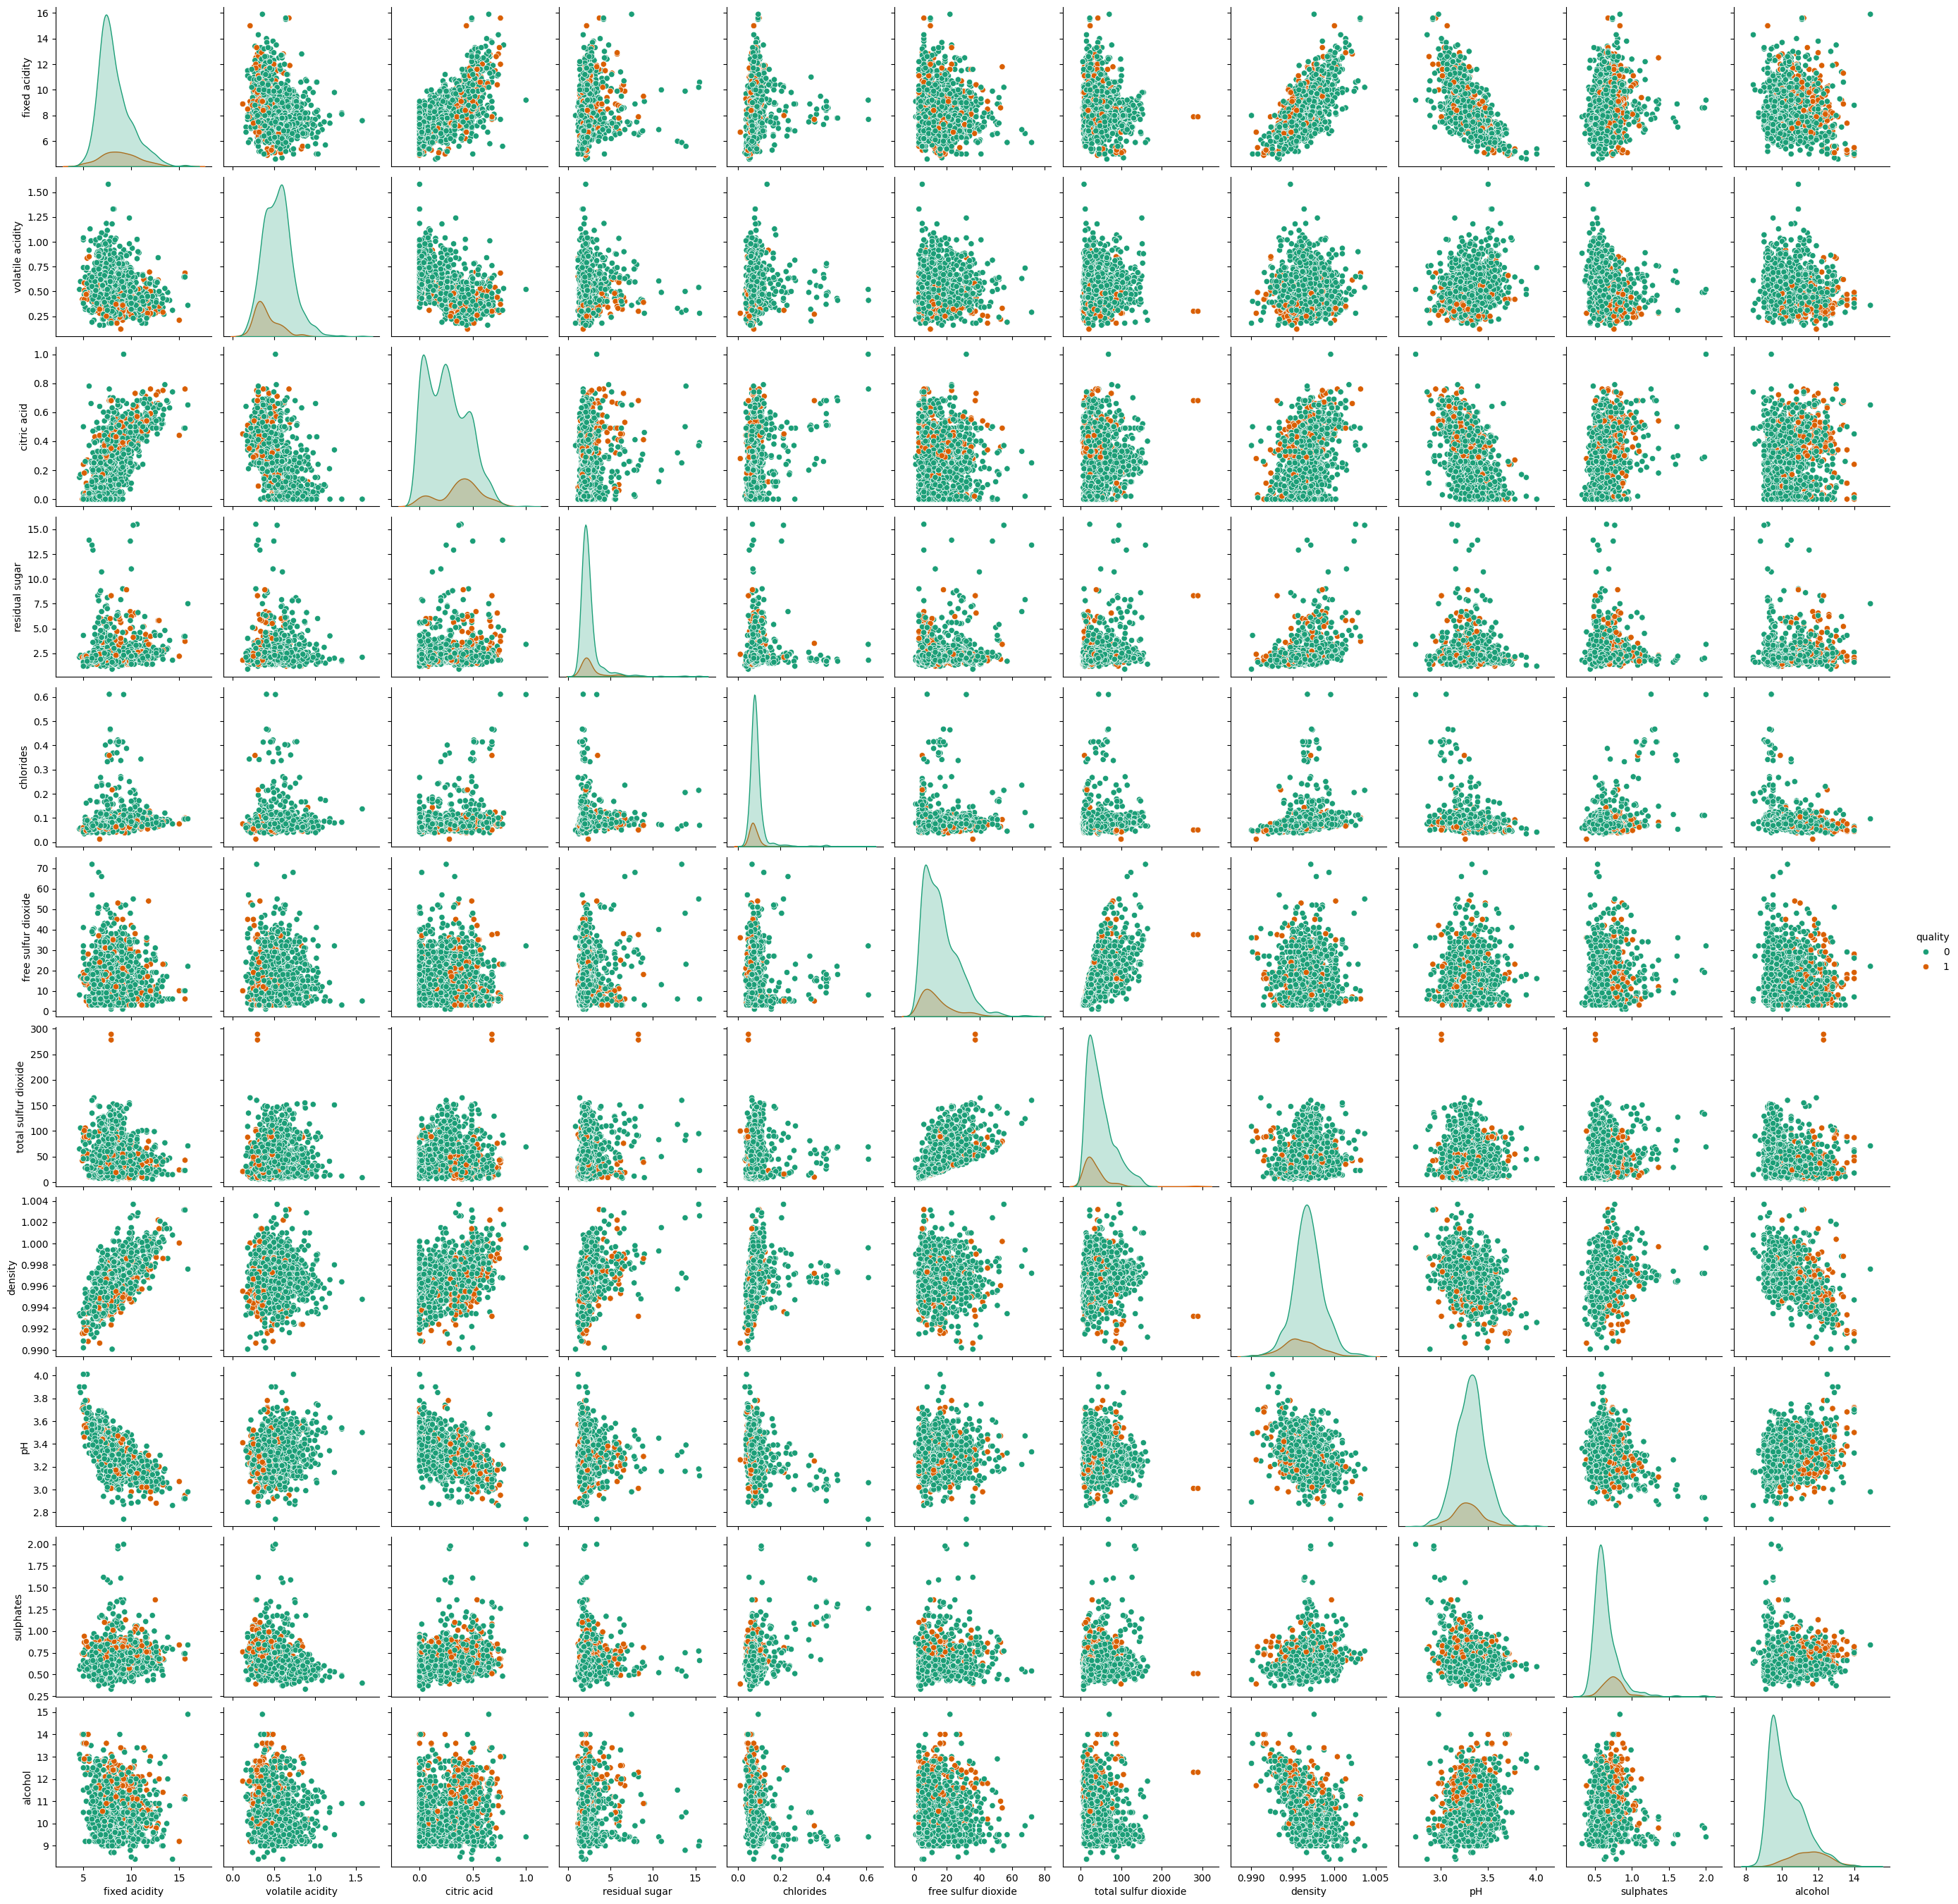

In [ ]:
sns.pairplot(df, hue = 'quality', palette='Dark2')
plt.show()

## Splitting the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['quality'])

In [ ]:
train_set['quality'].value_counts() / len(train_set)

quality
0    0.863956
1    0.136044
Name: count, dtype: float64

In [ ]:
test_set['quality'].value_counts() / len(test_set)

quality
0    0.865625
1    0.134375
Name: count, dtype: float64

Now in this way both the train set and the test set have samples from each class.

## Outliers Detection and Removal

Removing outliers from the entire dataset, including the test set, would alter the overall distribution of the data. This could lead to a model that performs well on the "cleaned" training data but doesn't generalize well to real-world data containing outliers, which are often present.

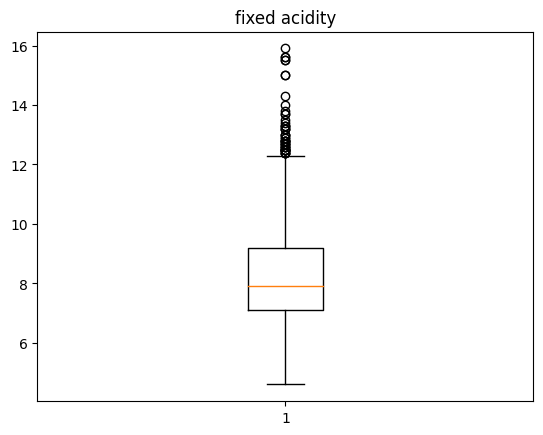

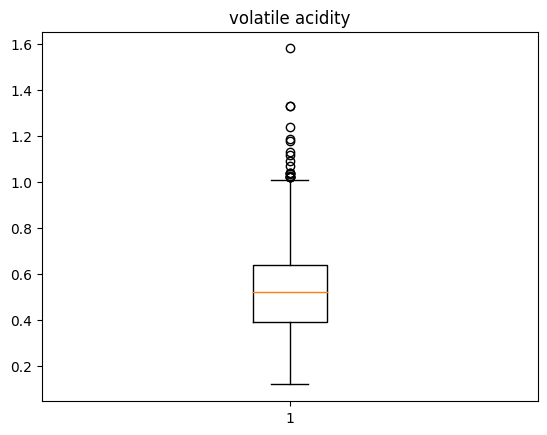

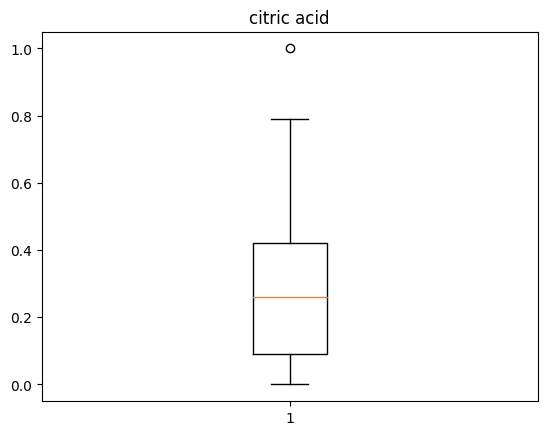

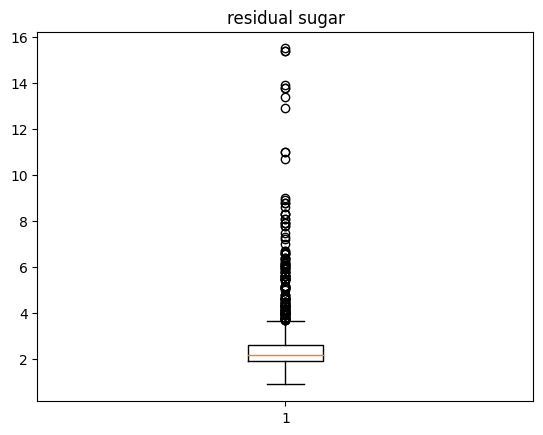

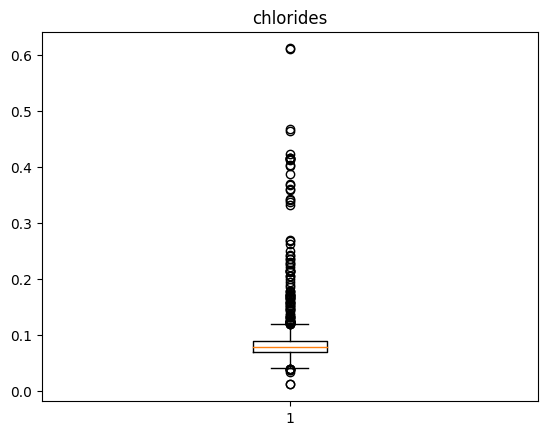

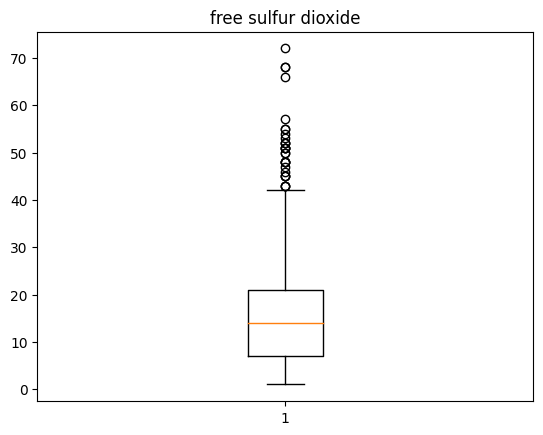

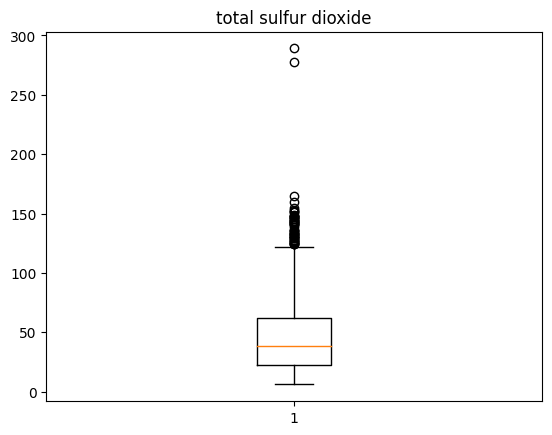

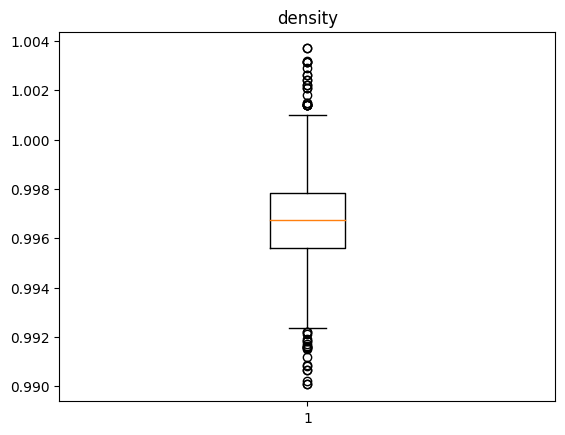

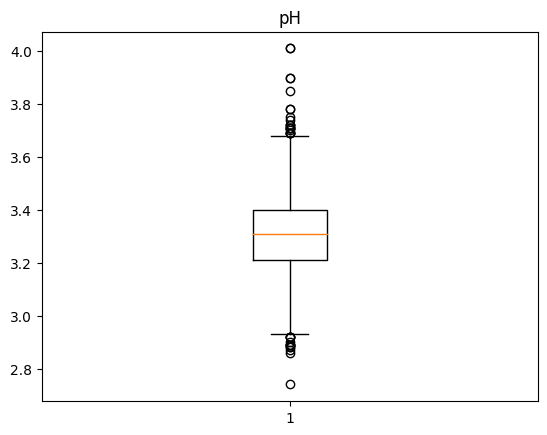

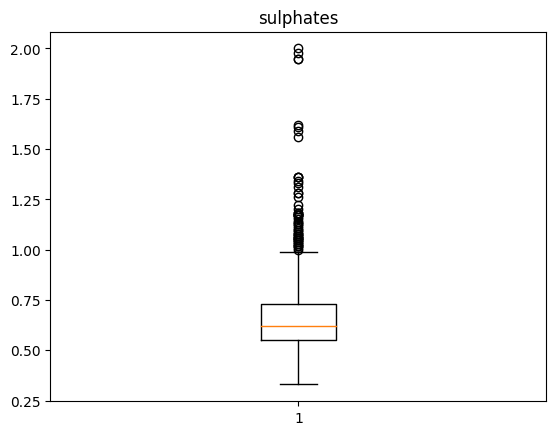

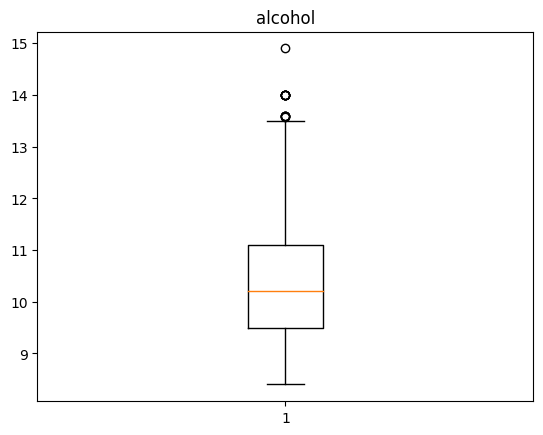

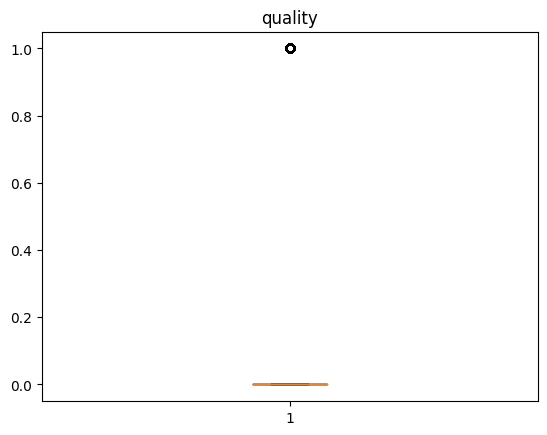

In [ ]:
for i in train_set.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
new_train_set_without_outliers = train_set.copy()

In [ ]:
new_train_set_without_outliers

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
56             10.2             0.420         0.57             3.4      0.070   
1017            8.0             0.180         0.37             0.9      0.049   
1364            7.2             0.605         0.02             1.9      0.096   
1544            8.4             0.370         0.43             2.3      0.063   
1419            7.7             0.640         0.21             2.2      0.077   
...             ...               ...          ...             ...        ...   
1533            8.0             0.390         0.30             1.9      0.074   
508            10.0             0.590         0.31             2.2      0.090   
1172            9.7             0.420         0.46             2.1      0.074   
1027            6.4             0.795         0.00             2.2      0.065   
1178            5.6             0.915         0.00             2.1      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
56                    4.0                  10.0  0.99710  3.04       0.63   
1017                 36.0                 109.0  0.99007  2.89       0.44   
1364                 10.0                  31.0  0.99500  3.46       0.53   
1544                 12.0                  19.0  0.99550  3.17       0.81   
1419                 32.0                 133.0  0.99560  3.27       0.45   
...                   ...                   ...      ...   ...        ...   
1533                 32.0                  84.0  0.99717  3.39       0.61   
508                  26.0                  62.0  0.99940  3.18       0.63   
1172                  5.0                  16.0  0.99649  3.27       0.74   
1027                 28.0                  52.0  0.99378  3.49       0.52   
1178                 17.0                  78.0  0.99346  3.68       0.73   

      alcohol  quality  
56        9.6        0  
1017     12.7        0  
1364     11.8        0  
1544     11.2        1  
1419      9.9        0  
...       ...      ...  
1533      9.0        0  
508      10.2        0  
1172     12.3        0  
1027     11.6        0  
1178     11.4        0  

[1279 rows x 12 columns]

In [ ]:
columns = new_train_set_without_outliers.columns
columns = list(columns)
columns.remove('quality')
print(columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
for i in columns:
  Q1, Q3 = np.percentile(new_train_set_without_outliers[i], [25, 75])
  iqr = Q3 - Q1

  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr

  print(lower_bound, i)
  print(upper_bound, i)

  condition = (new_train_set_without_outliers[i] < lower_bound) | (new_train_set_without_outliers[i] > upper_bound)

  for j in new_train_set_without_outliers[condition].index:
    try:
      new_train_set_without_outliers.drop(j, inplace=True)
    except:
      print('The index does not exist, it has been already removed')
      continue

3.799999999999998 fixed acidity
12.600000000000001 fixed acidity
0.015000000000000013 volatile acidity
1.0150000000000001 volatile acidity
-0.3799999999999999 citric acid
0.8999999999999999 citric acid
0.8499999999999996 residual sugar
3.6500000000000004 residual sugar
0.04000000000000002 chlorides
0.11999999999999998 chlorides
-11.5 free sulfur dioxide
40.5 free sulfur dioxide
-33.5 total sulfur dioxide
114.5 total sulfur dioxide
0.9923500000000001 density
1.00075 density
2.96 pH
3.6800000000000006 pH
0.31000000000000016 sulphates
0.9499999999999998 sulphates
7.25 alcohol
13.25 alcohol


In [ ]:
new_train_set_without_outliers

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
56             10.2             0.420         0.57             3.4      0.070   
1364            7.2             0.605         0.02             1.9      0.096   
1544            8.4             0.370         0.43             2.3      0.063   
786             9.9             0.350         0.41             2.3      0.083   
757             8.1             0.870         0.00             2.2      0.084   
...             ...               ...          ...             ...        ...   
1533            8.0             0.390         0.30             1.9      0.074   
508            10.0             0.590         0.31             2.2      0.090   
1172            9.7             0.420         0.46             2.1      0.074   
1027            6.4             0.795         0.00             2.2      0.065   
1178            5.6             0.915         0.00             2.1      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
56                    4.0                  10.0  0.99710  3.04       0.63   
1364                 10.0                  31.0  0.99500  3.46       0.53   
1544                 12.0                  19.0  0.99550  3.17       0.81   
786                  11.0                  61.0  0.99820  3.21       0.50   
757                  10.0                  31.0  0.99656  3.25       0.50   
...                   ...                   ...      ...   ...        ...   
1533                 32.0                  84.0  0.99717  3.39       0.61   
508                  26.0                  62.0  0.99940  3.18       0.63   
1172                  5.0                  16.0  0.99649  3.27       0.74   
1027                 28.0                  52.0  0.99378  3.49       0.52   
1178                 17.0                  78.0  0.99346  3.68       0.73   

      alcohol  quality  
56        9.6        0  
1364     11.8        0  
1544     11.2        1  
786       9.5        0  
757       9.8        0  
...       ...      ...  
1533      9.0        0  
508      10.2        0  
1172     12.3        0  
1027     11.6        0  
1178     11.4        0  

[927 rows x 12 columns]

## Correlations

It is necessary to put test data aside first as if we get insights into that data then we choose a model and a method that suits it, in a way this will cause an issue when we deploy our model, it won't be able to generalize well. Hence to avoid this issue it is better to keep the test set away.

In [ ]:
new_train_set_without_outliers.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.278259     0.663175   
volatile acidity          -0.278259          1.000000    -0.633404   
citric acid                0.663175         -0.633404     1.000000   
residual sugar             0.228869          0.011314     0.148085   
chlorides                  0.181539          0.115193     0.080341   
free sulfur dioxide       -0.175092         -0.012135    -0.097855   
total sulfur dioxide      -0.120662          0.089650    -0.027648   
density                    0.626092          0.031301     0.312714   
pH                        -0.705525          0.217252    -0.488226   
sulphates                  0.169635         -0.321872     0.251017   
alcohol                   -0.049497         -0.220779     0.135221   
quality                    0.108377         -0.250669     0.198491   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.228869   0.181539            -0.175092   
volatile acidity            0.011314   0.115193            -0.012135   
citric acid                 0.148085   0.080341            -0.097855   
residual sugar              1.000000   0.210206             0.062487   
chlorides                   0.210206   1.000000             0.004700   
free sulfur dioxide         0.062487   0.004700             1.000000   
total sulfur dioxide        0.155719   0.156927             0.641721   
density                     0.371407   0.393265            -0.033534   
pH                         -0.064953  -0.167143             0.169406   
sulphates                   0.018296  -0.097053             0.105689   
alcohol                     0.119473  -0.305607            -0.020623   
quality                     0.028475  -0.136800            -0.062487   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.120662  0.626092 -0.705525   0.169635   
volatile acidity                  0.089650  0.031301  0.217252  -0.321872   
citric acid                      -0.027648  0.312714 -0.488226   0.251017   
residual sugar                    0.155719  0.371407 -0.064953   0.018296   
chlorides                         0.156927  0.393265 -0.167143  -0.097053   
free sulfur dioxide               0.641721 -0.033534  0.169406   0.105689   
total sulfur dioxide              1.000000  0.127346  0.060460  -0.052387   
density                           0.127346  1.000000 -0.265943   0.056163   
pH                                0.060460 -0.265943  1.000000  -0.001015   
sulphates                        -0.052387  0.056163 -0.001015   1.000000   
alcohol                          -0.225852 -0.547415  0.130309   0.268295   
quality                          -0.155570 -0.187635 -0.087485   0.310988   

                       alcohol   quality  
fixed acidity        -0.049497  0.108377  
volatile acidity     -0.220779 -0.250669  
citric acid           0.135221  0.198491  
residual sugar        0.119473  0.028475  
chlorides            -0.305607 -0.136800  
free sulfur dioxide  -0.020623 -0.062487  
total sulfur dioxide -0.225852 -0.155570  
density              -0.547415 -0.187635  
pH                    0.130309 -0.087485  
sulphates             0.268295  0.310988  
alcohol               1.000000  0.400523  
quality               0.400523  1.000000

It is evident from the given data that alcohol has the highest correlation with the quality of the wine. This can cause a issue for the model as it can happen that the model won't consider other parameters and solely consider 'ALCOHOL' to determine the quality of wine. And is something we don't want.

In [ ]:
new_train_set_without_outliers.drop('alcohol', axis = 1,inplace= True)

In [ ]:
test_set.drop('alcohol', axis = 1,inplace= True)

## Splitting the data in X_train, y_train and X_test, y_test

In [ ]:
X_train = new_train_set_without_outliers.drop('quality', axis=1)
y_train = new_train_set_without_outliers['quality'].copy()

In [ ]:
X_train.shape

(927, 10)

In [ ]:
y_train.shape

(927,)

In [ ]:
X_test = test_set.drop('quality', axis=1)
y_test = test_set['quality'].copy()

In [ ]:
X_test.shape

(320, 10)

In [ ]:
y_test.shape

(320,)

## Get rid of Skewness

As you can see we have handled the skewness by getting rid of the outliers. And now the values are below 1 which means that the data is moderately skewed or in an acceptable range.

Hence we won't be applying any methods to get rid of skewness.

In [ ]:
new_train_set_without_outliers.skew()

fixed acidity           0.762849
volatile acidity        0.323208
citric acid             0.289728
residual sugar          0.643064
chlorides               0.232910
free sulfur dioxide     0.826685
total sulfur dioxide    0.920873
density                -0.001223
pH                      0.106890
sulphates               0.520464
quality                 2.299763
dtype: float64

In [ ]:
train_set.skew()

fixed acidity           0.909030
volatile acidity        0.643181
citric acid             0.301784
residual sugar          4.569600
chlorides               5.763078
free sulfur dioxide     1.294728
total sulfur dioxide    1.220681
density                 0.071866
pH                      0.211353
sulphates               2.414074
alcohol                 0.849594
quality                 2.125709
dtype: float64

## Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

Features          VIF
0         fixed acidity   124.277252
1      volatile acidity    22.612786
2           citric acid    13.501346
3        residual sugar    34.017620
4             chlorides    38.697295
5   free sulfur dioxide     7.645110
6  total sulfur dioxide     7.089102
7               density  2392.380630
8                    pH  1840.760817
9             sulphates    48.187087

In [ ]:
X_train.drop('density', axis = 1, inplace= True)

In [ ]:
X_test.drop('density', axis = 1, inplace= True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

Features         VIF
0         fixed acidity   72.549699
1      volatile acidity   22.600174
2           citric acid   13.472144
3        residual sugar   33.686030
4             chlorides   37.866918
5   free sulfur dioxide    7.631830
6  total sulfur dioxide    7.081528
7                    pH  105.484338
8             sulphates   48.038216

In [ ]:
X_train.drop('pH', axis = 1, inplace= True)

In [ ]:
X_test.drop('pH', axis = 1, inplace= True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

Features        VIF
0         fixed acidity  70.995206
1      volatile acidity  19.728598
2           citric acid  13.379679
3        residual sugar  31.826245
4             chlorides  34.505412
5   free sulfur dioxide   7.614778
6  total sulfur dioxide   7.081487
7             sulphates  28.644854

In [ ]:
X_train.drop('fixed acidity', axis = 1, inplace= True)

In [ ]:
X_test.drop('fixed acidity', axis = 1, inplace= True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

Features        VIF
0      volatile acidity  16.753925
1           citric acid   7.636992
2        residual sugar  30.842173
3             chlorides  30.996005
4   free sulfur dioxide   7.613529
5  total sulfur dioxide   6.930373
6             sulphates  24.277923

## Oversampling the data

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state=42)
X_train, y_train = SM.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(1626, 7)

In [ ]:
y_train.shape

(1626,)

In [ ]:
y_train.value_counts()

quality
0    813
1    813
Name: count, dtype: int64

## Scaling the data

  We are scaling the data first as PCA - Pricipal Component Analysis considers that the data is zero centered.
  
  By standard scaling we are basically converting the mean of the data to 0 and standard deviation to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[]

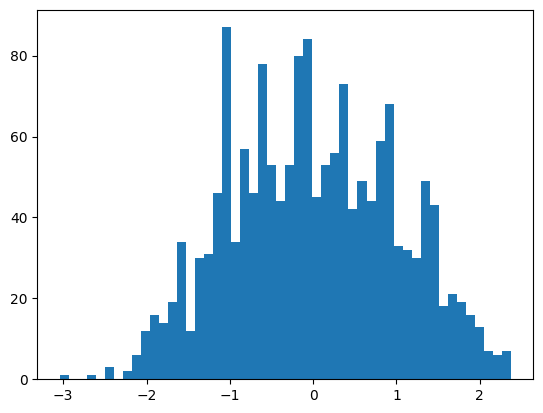

In [ ]:
# Just checking

plt.hist(X_train_scaled[:,6], bins=50)
plt.plot()

## Principal Component Analysis

Reducing the size of the dataset by 2 columns yet preserving 95% of the information.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
pca.explained_variance_ratio_

array([0.29979964, 0.228342  , 0.19087493, 0.11077972, 0.0881539 ,
       0.04623923])

In [ ]:
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_test_pca.shape

(320, 6)

In [ ]:
X_train_pca.shape

(1626, 6)

## Looking for the models on data after PCA

Now that our data is ready, we can run various different models to look which performs the best.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train)
sgd_clf.score(X_test_pca, y_test)

0.75

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.803125

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)
dt.score(X_test_pca, y_test)


0.859375

In [ ]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_pca, y_train)
rt.score(X_test_pca, y_test)

0.88125

In [ ]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_pca, y_train)
svc_clf.score(X_test_pca, y_test)

0.828125

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.796875

## Looking for model on data before PCA

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.score(X_test_scaled, y_test)

0.721875

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.790625

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)


0.846875

In [ ]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_scaled, y_train)
rt.score(X_test_scaled, y_test)

0.9

In [ ]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_scaled, y_train)
svc_clf.score(X_test_scaled, y_test)

0.840625

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
knn_clf.score(X_test_scaled, y_test)

0.79375

## Conclusion

The best model in this case is RandomForest model with a score of 0.9 on the Test Set.